# Problem statement:


 #####  A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons - 
- The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
- A sizeable department has to be maintained, for the purposes of recruiting new talent
- More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company
- Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.

- Since you are one of the star analysts at the firm, this project has been given to you.

- Goal of the case study You are required to model the probability of attrition. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.

##### Columns
- EmployeeIDEmployee number/id
- EnvironmentSatisfactionWork Environment Satisfaction Level
- JobSatisfactionJob Involvement Level Job Involvement Level Job Involvement Level
- WorkLifeBalanceWork life balance level

### Step1:Launching of Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset=pd.read_csv("general_data.csv") #loading dataset
dataset.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


__display columns :__

In [5]:
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [6]:
dataset

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


### __Step2 : Data Preprocessing__

In [7]:
dataset.isnull() #check null values

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4406,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4407,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4408,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
dataset.dropna() #drop null values

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,1,4405,Female,...,1.0,Y,18,8,0,6.0,2,6,1,5
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2


In [20]:
dataset.duplicated() #check for duplicate values


0       False
1       False
2       False
3       False
4       False
        ...  
4405    False
4406    False
4407    False
4408    False
4409    False
Length: 4410, dtype: bool

In [21]:
dataset.drop_duplicates() #drop duplicate values

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


### __Step 3:Univariate Analysis__

In [22]:
dataset1=dataset[['Age','DistanceFromHome','Education','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].describe()

In [23]:
dataset1

,Age,DistanceFromHome,Education,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,65029.312925,2.694830,15.209524,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,47068.888559,2.498887,3.659108,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,29110.000000,1.000000,12.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,49190.000000,2.000000,14.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,83800.000000,4.000000,18.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,199990.000000,9.000000,25.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [34]:
dataset1=dataset[['Age','DistanceFromHome','Education','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].mean()

In [35]:
dataset1

Age                           36.923810
DistanceFromHome               9.192517
Education                      2.912925
MonthlyIncome              65029.312925
NumCompaniesWorked             2.694830
PercentSalaryHike             15.209524
TotalWorkingYears             11.279936
TrainingTimesLastYear          2.799320
YearsAtCompany                 7.008163
YearsSinceLastPromotion        2.187755
YearsWithCurrManager           4.123129
dtype: float64

In [36]:
dataset1=dataset[['Age','DistanceFromHome','Education','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].mode()

In [37]:
dataset1

,Age,DistanceFromHome,Education,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,35,2,3,23420,1.0,11,10.0,2,5,0,2


In [38]:
dataset1=dataset[['Age','DistanceFromHome','Education','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].median()

In [39]:
dataset1

Age                           36.0
DistanceFromHome               7.0
Education                      3.0
MonthlyIncome              49190.0
NumCompaniesWorked             2.0
PercentSalaryHike             14.0
TotalWorkingYears             10.0
TrainingTimesLastYear          3.0
YearsAtCompany                 5.0
YearsSinceLastPromotion        1.0
YearsWithCurrManager           3.0
dtype: float64

In [40]:
dataset1=dataset[['Age','DistanceFromHome','Education','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].var()

In [41]:
dataset1

Age                        8.341719e+01
DistanceFromHome           6.569144e+01
Education                  1.048438e+00
MonthlyIncome              2.215480e+09
NumCompaniesWorked         6.244436e+00
PercentSalaryHike          1.338907e+01
TotalWorkingYears          6.056298e+01
TrainingTimesLastYear      1.661465e+00
YearsAtCompany             3.751728e+01
YearsSinceLastPromotion    1.037935e+01
YearsWithCurrManager       1.272582e+01
dtype: float64

In [42]:
dataset1=dataset[['Age','DistanceFromHome','Education','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].std()
dataset1

Age                            9.133301
DistanceFromHome               8.105026
Education                      1.023933
MonthlyIncome              47068.888559
NumCompaniesWorked             2.498887
PercentSalaryHike              3.659108
TotalWorkingYears              7.782222
TrainingTimesLastYear          1.288978
YearsAtCompany                 6.125135
YearsSinceLastPromotion        3.221699
YearsWithCurrManager           3.567327
dtype: float64

In [43]:
dataset1=dataset[['Age','DistanceFromHome','Education','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].skew()

In [44]:
dataset1

Age                        0.413005
DistanceFromHome           0.957466
Education                 -0.289484
MonthlyIncome              1.368884
NumCompaniesWorked         1.026767
PercentSalaryHike          0.820569
TotalWorkingYears          1.116832
TrainingTimesLastYear      0.552748
YearsAtCompany             1.763328
YearsSinceLastPromotion    1.982939
YearsWithCurrManager       0.832884
dtype: float64

In [45]:
dataset1=dataset[['Age','DistanceFromHome','Education','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].kurt()
dataset1

Age                       -0.405951
DistanceFromHome          -0.227045
Education                 -0.560569
MonthlyIncome              1.000232
NumCompaniesWorked         0.007287
PercentSalaryHike         -0.302638
TotalWorkingYears          0.912936
TrainingTimesLastYear      0.491149
YearsAtCompany             3.923864
YearsSinceLastPromotion    3.601761
YearsWithCurrManager       0.167949
dtype: float64

###  Inference from analysis:

- all the variables show positive skewness,except Education where as Age,DistanceFromHome,Education and PercentSalaryHike are playtkurtic where as all other variables are lepokurtic

- The Monthly_Income’s IQR is at 54K suggesting company wide attrition across all income bands

- Mean age forms a near normal distribution with 13 years of IQR Outlier

### Outliers:

In [51]:
import matplotlib.pyplot as plt

##### Boxplot for Age variable:

{'whiskers': [<matplotlib.lines.Line2D at 0x2afd3feef48>,
 'caps': [<matplotlib.lines.Line2D at 0x2afd46d0bc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2afd2e0ffc8>],
 'medians': [<matplotlib.lines.Line2D at 0x2afd46d0dc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2afd46d6e48>],
 'means': []}

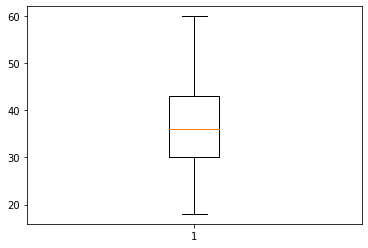

In [50]:
plt.boxplot(dataset.Age)

__i.e age is normally  distributed without outliers__

##### Boxplot for DistanceFromHome

{'whiskers': [<matplotlib.lines.Line2D at 0x2afd4766988>,
 'caps': [<matplotlib.lines.Line2D at 0x2afd4766b48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2afd47096c8>],
 'medians': [<matplotlib.lines.Line2D at 0x2afd476df88>],
 'fliers': [<matplotlib.lines.Line2D at 0x2afd476dbc8>],
 'means': []}

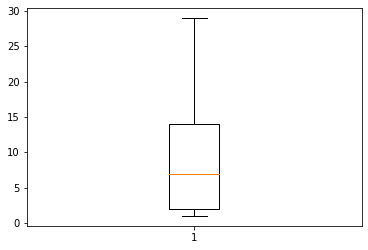

In [52]:
plt.boxplot(dataset.DistanceFromHome)

#####  DistanceFromHome is right skewed with no outliers

##### Boxplot for monthly income:

{'whiskers': [<matplotlib.lines.Line2D at 0x2afd47cef88>,
 'caps': [<matplotlib.lines.Line2D at 0x2afd47d6c08>,
 'boxes': [<matplotlib.lines.Line2D at 0x2afd478fd48>],
 'medians': [<matplotlib.lines.Line2D at 0x2afd47d6dc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2afd47dcc48>],
 'means': []}

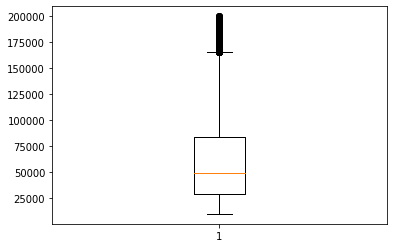

In [53]:
plt.boxplot(dataset.MonthlyIncome)

##### Monthly income is right skewed with several outliers

#### Boxplot for YearsAtCompany:

{'whiskers': [<matplotlib.lines.Line2D at 0x2afd4830cc8>,
 'caps': [<matplotlib.lines.Line2D at 0x2afd4848988>,
 'boxes': [<matplotlib.lines.Line2D at 0x2afd47e9e08>],
 'medians': [<matplotlib.lines.Line2D at 0x2afd4848b48>],
 'fliers': [<matplotlib.lines.Line2D at 0x2afd484e9c8>],
 'means': []}

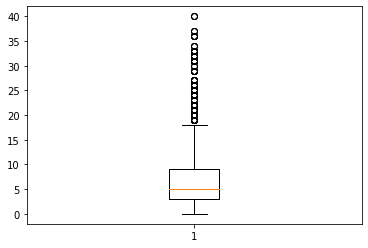

In [56]:
plt.boxplot(dataset.YearsAtCompany)

#####  YearsAtCompany is also right skewed with several outliers

#### Scatterplots between Age,Education,DistanceFromHome,YearsAtCompany vs Attrition:

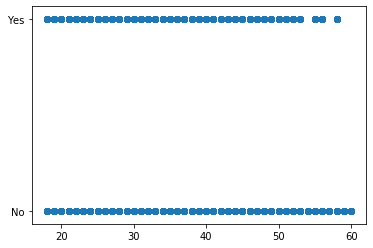

In [57]:
plt.scatter(dataset.Age,dataset.Attrition)

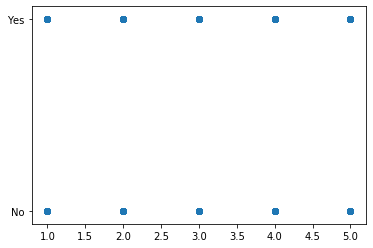

In [58]:
plt.scatter(dataset.Education,dataset.Attrition)

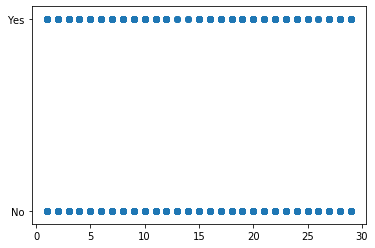

In [60]:
plt.scatter(dataset.DistanceFromHome,dataset.Attrition)

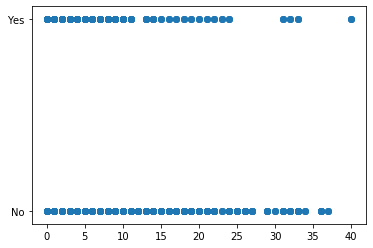

In [61]:
plt.scatter(dataset.YearsAtCompany,dataset.Attrition)

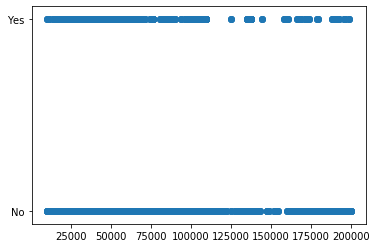

In [63]:
plt.scatter(dataset.MonthlyIncome,dataset.Attrition)

###### i.e There is no regression found while plotting Age,Education,YearsAtCompany,MonthlyIncome etc on a scatterplot 

### Step4 : Visualisation

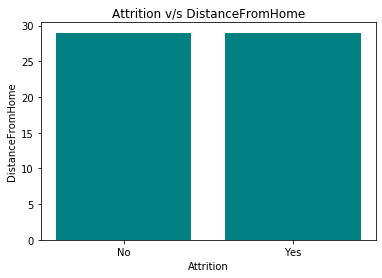

In [73]:
plt.xlabel('Attrition')
plt.ylabel('DistanceFromHome')
plt.title('Attrition v/s DistanceFromHome')
plt.bar( dataset['Attrition'], dataset['DistanceFromHome'], color='teal' )
plt.show()

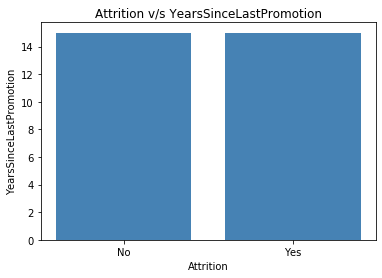

In [77]:
plt.xlabel('Attrition')
plt.ylabel('YearsSinceLastPromotion')
plt.title('Attrition v/s YearsSinceLastPromotion')
plt.bar( dataset['Attrition'], dataset['YearsSinceLastPromotion'], color='steelblue' )
plt.show()

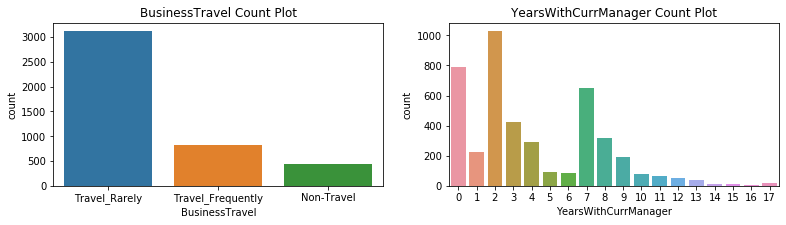

In [84]:
import seaborn as sns
plt.figure( figsize=(13,3) )

plt.subplot(1, 2, 1)
plt.title('BusinessTravel Count Plot')
sns.countplot( x='BusinessTravel', data=dataset)

plt.subplot(1, 2, 2)
plt.title('YearsWithCurrManager Count Plot')
sns.countplot( x='YearsWithCurrManager', data=dataset)

plt.show()

### Step5:Correlation Analysis

In [86]:
dataset['Attrition'].replace(to_replace=("Yes","No"),value=(0,1),inplace=True)

In [92]:
dataset['BusinessTravel'].replace(to_replace=("Non-Travel","Travel_Rarely","Travel_Frequently"),value=(0,1,2),inplace=True)

In [93]:
dataset['Gender'].replace(to_replace=("Female","Male"),value=(0,1),inplace=True)

In [94]:
dataset['MaritalStatus'].replace(to_replace=("Single","Married","Divorced"),value=(0,1,2),inplace=True)

In [95]:
dataset['Department'].replace(to_replace=("Sales","Research & Development","Human Resources"),value=(0,1,2),inplace=True)

In [96]:
dataset.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,1,1,0,6,2,Life Sciences,1,1,0,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,0,2,1,10,1,Life Sciences,1,2,0,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,1,2,1,17,4,Other,1,3,1,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,1,0,1,2,5,Life Sciences,1,4,1,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,1,1,1,10,1,Medical,1,5,1,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [97]:
from scipy.stats import pearsonr

#### Attrition vs Distancefromhome

In [98]:
stats,p=pearsonr(dataset.Attrition,dataset.DistanceFromHome)
print(stats,p)
if p<0.05:
    print("reject  NULL hypothesis \n")
else:
    print("accept Null hypothesis")

0.009730141010179666 0.5182860428050771
accept Null hypothesis


__AS p>0.05 we accept null hypothesis therefore ther is no significant correaltion between attrition and distancefromhome__

#### Attrition vs MonthlyIncome:

In [100]:
stats,p=pearsonr(dataset.Attrition,dataset.MonthlyIncome)
print(stats,p)
if p<0.05:
    print("reject  NULL hypothesis \n")
else:
    print("accept Null hypothesis")

0.031176281698114996 0.03842748490600132
reject  NULL hypothesis 



__AS p<0.05 we reject null hypothesis.Therefore,there is significant correlation between attrition and monthly income.
since r value is negative there is negative correaltion between attrition and monthly income__

#### Attrition vsYearsAtCompany


In [102]:
stats,p=pearsonr(dataset.Attrition,dataset.YearsAtCompany)
print(stats,p)
if p<0.05:
    print("reject  NULL hypothesis \n")
else:
    print("accept Null hypothesis")

0.1343922139899772 3.1638831224877484e-19
reject  NULL hypothesis 



__AS p<0.05 we reject null hypothesis.Therefore,there is significant correlation between attrition and monthly income. since r value is positive there is negative correlation between attrition and years at company__

#### Attrition vs YearsWithCurrManager:


In [103]:
stats,p=pearsonr(dataset.Attrition,dataset.YearsWithCurrManager)
print(stats,p)
if p<0.05:
    print("reject  NULL hypothesis \n")
else:
    print("accept Null hypothesis")

0.1561993159016285 1.7339322652896276e-25
reject  NULL hypothesis 



__AS p<0.05 we reject null hypothesis.Therefore,there is significant correlation between attrition and monthly income. since r value is positive there is negative correlation between attrition and years at company__

### Correlation Matrix:

In [108]:
dataset.corr()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EmployeeCount,EmployeeID,Gender,JobLevel,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.159205,-0.011807,0.010846,0.006963,-0.035706,NaN,0.008649,-0.039352,-0.002884,...,-0.044314,0.299243,-0.033137,NaN,-0.031753,0.680661,-0.027308,0.311309,0.216513,0.202089
Attrition,0.159205,1.000000,-0.127006,-0.048206,0.009730,0.015111,NaN,0.004729,-0.018125,0.010290,...,0.031176,-0.042345,-0.032533,NaN,0.006839,0.170338,0.049431,0.134392,0.033019,0.156199
BusinessTravel,-0.011807,-0.127006,1.000000,-0.050680,0.014130,0.007567,NaN,-0.003737,-0.021404,0.013727,...,-0.055905,-0.030598,-0.025727,NaN,0.004770,0.008324,-0.043173,0.005212,0.005222,-0.000229
Department,0.010846,-0.048206,-0.050680,1.000000,-0.012134,0.004597,NaN,0.003455,-0.003158,-0.002923,...,0.032237,0.003954,0.007840,NaN,-0.010512,0.019839,-0.012866,-0.010078,-0.014845,-0.018016
DistanceFromHome,0.006963,0.009730,0.014130,-0.012134,1.000000,-0.008638,NaN,-0.001097,-0.044173,-0.037329,...,-0.021607,-0.013843,0.038125,NaN,0.011169,0.009374,-0.009001,0.031684,0.002290,0.021584
Education,-0.035706,0.015111,0.007567,0.004597,-0.008638,1.000000,NaN,-0.009680,-0.016547,0.045746,...,0.006410,-0.016250,-0.040531,NaN,0.001261,-0.010717,0.010472,0.006080,0.022490,0.005358
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeID,0.008649,0.004729,-0.003737,0.003455,-0.001097,-0.009680,NaN,1.000000,-0.013165,-0.003303,...,0.007338,-0.001117,-0.004456,NaN,-0.014254,-0.001063,-0.010191,0.004086,0.000256,0.008579
Gender,-0.039352,-0.018125,-0.021404,-0.003158,-0.044173,-0.016547,NaN,-0.013165,1.000000,-0.026854,...,0.007530,-0.066924,0.011841,NaN,0.019237,-0.027598,-0.030167,-0.017277,-0.021812,0.004438
JobLevel,-0.002884,0.010290,0.013727,-0.002923,-0.037329,0.045746,NaN,-0.003303,-0.026854,1.000000,...,0.047316,-0.009875,0.010973,NaN,0.000993,-0.036957,-0.032500,-0.064219,-0.060811,-0.055251
